#Init

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#Cost function in pure Python

$$cost(W) = \frac{1}{m}\sum_{i=1}^{m}(Wx_i - y_i)^2$$

In [40]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  c = 0
  for i in range(len(X)):
    c += (W * X[i] - Y[i]) ** 2
  return c / len(X)

history = np.array(np.empty((1, 2)))
for feed_W in np.linspace(-3, 5, num=15):
  curr_cost = cost_func(feed_W, X, Y)
  history = np.vstack([history, [feed_W, curr_cost]])
  print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


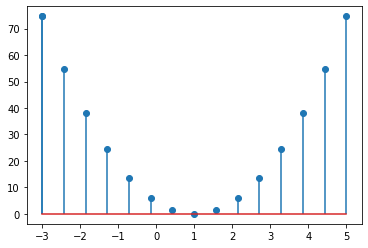

In [46]:
plt.stem(history[:, 0], history[:, 1], use_line_collection=True)
plt.show()

#Cost function in TensorFlow

In [48]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  hypothesis = X * W
  return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values:
  curr_cost = cost_func(feed_W, X, Y)
  cost_values.append(curr_cost)
  print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


#Gradient descent

$$cost(W) = \frac{1}{m}\sum_{i=1}^{m}(Wx_i - y_i)^2$$
$$W := W - {\alpha}\frac{1}{m}\sum_{i=1}^{m}(W(x_i) - y_i)x_i$$

In [ ]:
alpha = 0.01
gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
descent = W - tf.multiply(alpah, gradient)
W.assign(descent)

In [54]:
tf.random.set_seed(0)

x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random.normal([1], -100., 100.))

history = np.array(np.empty((1, 2)))

for step in range(300):
  hypothesis = W * X
  cost = tf.reduce_mean(tf.square(hypothesis - Y))

  alpha = 0.01
  gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
  descent = W - tf.multiply(alpha, gradient)
  W.assign(descent)

  history = np.vstack([history, [step, W]])

  if step % 10 == 0:
    print('{:5} | {:10.4f} | {:10.6}'.format(step, cost.numpy(), W.numpy()[0]))

    0 | 11716.3086 |     48.768
   10 |  4504.9126 |      30.62
   20 |  1732.1364 |    19.3668
   30 |   666.0052 |    12.3889
   40 |   256.0785 |      8.062
   50 |    98.4620 |    5.37901
   60 |    37.8586 |    3.71534
   70 |    14.5566 |    2.68373
   80 |     5.5970 |    2.04404
   90 |     2.1520 |    1.64739
  100 |     0.8275 |    1.40143
  110 |     0.3182 |    1.24892
  120 |     0.1223 |    1.15435
  130 |     0.0470 |    1.09571
  140 |     0.0181 |    1.05935
  150 |     0.0070 |     1.0368
  160 |     0.0027 |    1.02282
  170 |     0.0010 |    1.01415
  180 |     0.0004 |    1.00877
  190 |     0.0002 |    1.00544
  200 |     0.0001 |    1.00337
  210 |     0.0000 |    1.00209
  220 |     0.0000 |     1.0013
  230 |     0.0000 |     1.0008
  240 |     0.0000 |     1.0005
  250 |     0.0000 |    1.00031
  260 |     0.0000 |    1.00019
  270 |     0.0000 |    1.00012
  280 |     0.0000 |    1.00007
  290 |     0.0000 |    1.00005


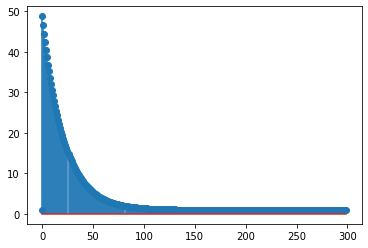

In [55]:
plt.stem(history[:, 0], history[:, 1], use_line_collection=True)
plt.show()